# Figure 6
Data is assumed to be in the folder "../../data/sequencing_runs/" if that is not true change below

## setup

In [11]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from qmap_paper.plotting import publication_style_ax, publication_scatter, publication_line
from qmap_paper.titration import normalize_data, normalized_hill_equation, compute_mg_1_2
from qmap_paper.data_processing import get_dms_reactivity_for_sub_structure, SequenceStructure

# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 20
plt.rcParams["figure.facecolor"] = "white"

In [9]:
DATA_PATH = "../../data/sequencing_runs/"

In [10]:
df_wt_mg = pd.read_json(f"{DATA_PATH}/processed/wt_mg_titra.json")
df_wt_buff = pd.read_json(f"{DATA_PATH}/processed/wt_buffer_titra.json")
df_mttr6_muts = pd.read_json(f"{DATA_PATH}/processed/mttr6_muts_titra.json")
df_mttr6_full = pd.read_json(f"{DATA_PATH}/processed/mttr6_data_full.json")

In [69]:
df_mttr6_full = df_mttr6_full[df_mttr6_full["mg_conc"] != 5.0]

### extra functions

In [25]:
def generate_pymol_file(data, pymol_data_file):
    """
    Generate the PyMOL file for a single row.

    Args:
        data (list): The data to be written to the PyMOL file.
        pymol_data_file (str): The file path of the PyMOL data file to be generated.

    Returns:
        None

    Raises:
        None
    """
    with open(pymol_data_file, "w") as f:
        for i, d in enumerate(data):
            d = d * 25
            f.write(f"{i+1} {d} {d}\n")

## plots

In [12]:
df_wt = df_wt_mg[df_wt_mg["run_name"] == "2022_07_27_minittr_50mM_NaC_Mg_titra_seq"]
df_upper = df_mttr6_full[df_mttr6_full["name"] == "CAUGG_CCUAAA"]
df_lower = df_mttr6_full[df_mttr6_full["name"] == "CACGG_CCCUAAC"]

### generating pymol coloring files for CCUAAC_CAUGG

In [39]:
df_CCUAAC_CAUGG = df_mttr6_full[df_mttr6_full["name"] == "CCUAAC_CAUGG"]
ss = SequenceStructure("CACAUGG&CCUAACUG", "((...((&))....))") # sequence and structure for this variant

In [40]:
df_m_0 = df_CCUAAC_CAUGG[df_CCUAAC_CAUGG["mg_conc"] == 0.0]
data = get_dms_reactivity_for_sub_structure(df_m_0, ss)
full_data = df_m_0.iloc[0]['gaaa'] + data[0]
generate_pymol_file(full_data, "CCUAAC_CAUGG_mg_0.dat")

In [41]:
df_m_40 = df_CCUAAC_CAUGG[df_CCUAAC_CAUGG["mg_conc"] == 40.0]
row = df_m_40.iloc[0]
data = get_dms_reactivity_for_sub_structure(df_m_40, ss)
full_data = row['gaaa'] + data[0]
generate_pymol_file(full_data, "CCUAAC_CAUGGC_mg_40.dat")

### plotting and pymol coloring for CCUAAG_UACGG

In [28]:
df_UACGG_CCUAAG = df_mttr6_full[df_mttr6_full["name"] == "CCUAAG_UACGG"]

#### plotting U to C mutation in CCUAAG_UACGG


(0.0, 0.04)

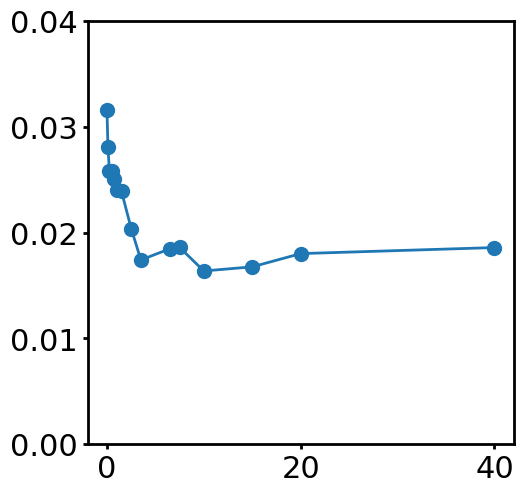

In [90]:
fig, ax = plt.subplots(figsize=(5.5, 5.5))
POS = 9
publication_style_ax(ax)
publication_line(ax, df_UACGG_CCUAAG['mg_conc'], df_UACGG_CCUAAG['tlr'].apply(lambda x : x[POS-1]), marker='o')
ax.set_ylim(0,0.04)

#### generating pymol coloring files for CCUAAG_UACGG

In [29]:
df_m_0 = df_UACGG_CCUAAG[df_UACGG_CCUAAG["mg_conc"] == 0.0]
df_m_40 = df_UACGG_CCUAAG[df_UACGG_CCUAAG["mg_conc"] == 40.0]
ss = SequenceStructure("AAUACGG&CCUAAGUU", "(((..((&))...)))")


In [93]:
data_m_0 = get_dms_reactivity_for_sub_structure(df_m_0, ss)
data_m_40 = get_dms_reactivity_for_sub_structure(df_m_40, ss)

In [94]:
row_m_0 = df_m_0.iloc[0]
row_m_40 = df_m_40.iloc[0]

In [95]:
full_data_m_0 = row_m_0['gaaa'] + data_m_0[0]
full_data_m_40 = row_m_40['gaaa'] + data_m_40[0]

In [96]:
generate_pymol_file(full_data_m_0, "UACGG_CCUAAG_mg_0.dat")
generate_pymol_file(full_data_m_40, "UACGG_CCUAAG_mg_40.dat")

### plotting and pymol coloring for CCUAAAG_UAUGG

In [97]:
df_AUAUGG_CCUAAAGU = df_mttr6_full[df_mttr6_full["name"] == "UAUGG_CCUAAAG"]

In [98]:
data = get_dms_reactivity_for_sub_structure(df_m_40, ss)

(0.0, 0.04)

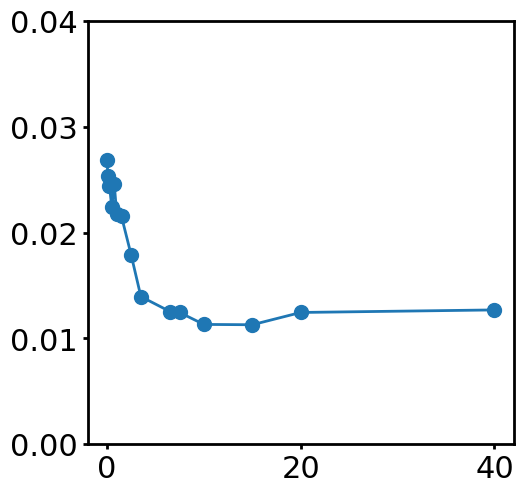

In [99]:
fig, ax = plt.subplots(figsize=(5.5, 5.5))
POS = 6
publication_style_ax(ax)
publication_line(ax, df_AUAUGG_CCUAAAGU['mg_conc'], df_AUAUGG_CCUAAAGU['tlr'].apply(lambda x : x[POS-1]), marker='o')
ax.set_ylim(0,0.04)

In [100]:
df_m_0 = df_AUAUGG_CCUAAAGU[df_AUAUGG_CCUAAAGU["mg_conc"] == 0.0]
df_m_40 = df_AUAUGG_CCUAAAGU[df_AUAUGG_CCUAAAGU["mg_conc"] == 40.0]

In [101]:
# note make sure to get the correct flanking pairs from the full sequence
ss = SequenceStructure("UAUAUGG&CCUAAAGUA", "(((..((&))....)))")


In [102]:
data_m_0 = get_dms_reactivity_for_sub_structure(df_m_0, ss)
data_m_40 = get_dms_reactivity_for_sub_structure(df_m_40, ss)

In [103]:
row_m_0 = df_m_0.iloc[0]
row_m_40 = df_m_40.iloc[0]

In [104]:
full_data_m_0 = row_m_0['gaaa'] + data_m_0[0]
full_data_m_40 = row_m_40['gaaa'] + data_m_40[0]

In [105]:
generate_pymol_file(full_data_m_0, "AUAUGG_CCUAAAGU_mg_0.dat")
generate_pymol_file(full_data_m_40, "AUAUGG_CCUAAAGU_mg_40.dat")